# K-Means

# Part 01: Scratch

# 0. Import Libraries

In [1]:
import math
import numpy as np
import pandas as pd
np.random.seed(123)

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans

import seaborn as sns

# 1. Read Data

In [2]:
data=pd.read_csv('/kaggle/input/data-kmeans/Data.csv')

In [3]:
data.head()

,x,y
0,-0.542,23.761
1,8.129,25.661
2,4.239,25.298
3,-0.691,25.230
4,3.539,21.645


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       60 non-null     float64
 1   y       60 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


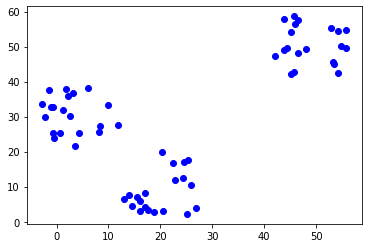

In [5]:
plt.scatter(data['x'], data['y'], c='b')

plt.show()

# 2. initialization centroids

In [6]:
def initialize_cent(k, data):
    
    n = data.shape[1]
    
    cent_min = data.min().min()
    cent_max = data.max().max()
    
    centroids = []
    
    for centroid in range(k):
        centroid = np.random.uniform(cent_min, cent_max, n)
        
        centroids.append(centroid)
        
    centroids = pd.DataFrame(centroids, columns=data.columns)
    
    return centroids

In [7]:
centroids = initialize_cent(3, data)

centroids

,x,y
0,39.996300,14.777837
1,11.134063,31.075254
2,41.409843,23.195700


# 3. Calculate the sum of squared errors

In [8]:
def calculate_error(a, b):
    
    error = np.square(np.sum((a-b)**2))   #(a(x)-b(x))^2 + (a(y)-b(y)^2)
    
    return error

In [9]:
errors = np.array([])

for centroid in range(centroids.shape[0]):
    error = calculate_error(centroids.iloc[centroid, :], data.iloc[0, :])
    
    errors = np.append(errors, error)

In [10]:
errors

array([2972351.68265223,   36034.96413044, 3098574.16619018])

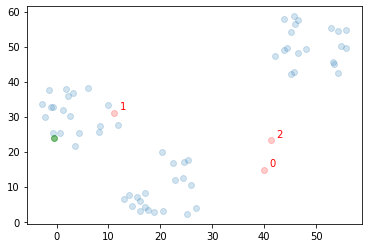

In [11]:
plt.scatter(data.iloc[1:, 0], data.iloc[1:, 1], marker= 'o', alpha=0.2)

plt.scatter(centroids.iloc[:, 0], centroids.iloc[:, 1], marker= 'o', alpha=0.2, c= 'r')

plt.scatter(data.iloc[0,0], data.iloc[0,1], marker= 'o', alpha=0.5, c='g')


for i in range(centroids.shape[0]):
    plt.text(centroids.iloc[i,0]+1, centroids.iloc[i,1]+1, s=centroids.index[i], c='r')

# 4. Assign a centroid to each of the observations

In [12]:
np.where(errors == np.min(errors))[0].tolist()[0]

1

In [13]:
def assign_centroid(data, centroids):
    
    m = data.shape[0]
    
    centroid_assign = []
    
    centroid_errors = []
    
    k = centroids.shape[0]
    
    for x in range(m):
        
        errors = np.array([])
        
        for centroid in range(k):
            error = calculate_error(centroids.iloc[centroid, :2], data.iloc[x, :2])
            errors = np.append(errors, error)
            
        close_cent = np.where(errors == np.min(errors))[0].tolist()[0]
        
        centroid_error = np.min(errors)
        
        centroid_assign.append(close_cent)
        centroid_errors.append(centroid_error)
        
    return (centroid_assign, centroid_errors)

In [14]:
data['centroid'], data['error'] = assign_centroid(data, centroids)

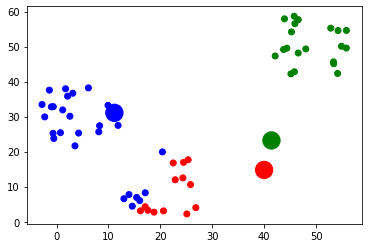

In [15]:
colors = {0:'red', 1:'blue', 2:'green'}

plt.scatter(data.iloc[:,0], data.iloc[:,1],
            marker='o', c= data['centroid'].apply(lambda x: colors[x]))
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1], marker='o', s=300, c = centroids.index.map(lambda x: colors[x]))

# 5. Calculate the sum of total errors

In [16]:
data['error'].sum()

21382270.708532356

# 6. Recalculate the position of the centroids

In [17]:
data_columns = ['x', 'y']

centroids = data.groupby('centroid').mean().loc[:, data_columns].reset_index(drop=True)

In [18]:
centroids

,x,y
0,22.112000,8.391077
1,6.094926,24.894370
2,48.898800,50.526050


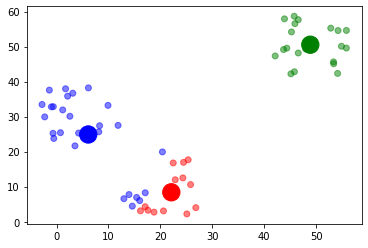

In [19]:
plt.scatter(data.iloc[:, 0], data.iloc[:, 1],
            marker='o', c= data['centroid'].apply(lambda x: colors[x]), alpha=0.5)

plt.scatter(centroids.iloc[:, 0], centroids.iloc[:, 1],
            marker='o', s=300, c= centroids.index.map(lambda x: colors[x]))


# 7. K-Means

In [20]:
def kmeans(data, k):
    
    # Initialize
    centroids = initialize_cent(k, data)
    
    error = []
    i = 0
    compr = True
    
    while(compr):
        
        data['centroid'], iter_error = assign_centroid(data, centroids)
        error.append(sum(iter_error))
        
        centroids = data.groupby('centroid').mean().loc[:, ['x','y']].reset_index(drop=True)
        
        if(len(error)<2):
            compr=True
            
        else:
            if(round(error[i], 3) != round(error[i-1], 3)):
                compr = True
            else:
                compr = False
        i = i+1
        
    data['centroid'], iter_error = assign_centroid(data, centroids)
    iter_error = sum(iter_error)
        
    centroids = data.groupby('centroid').mean().reset_index(drop=True)
        
    return (data['centroid'], iter_error, centroids)

In [21]:
data['centroid'], _, centroids  =kmeans(data.drop(['centroid', 'error'], axis=1), 3)

In [22]:
# data.loc[:, ['x','y']]

In [23]:
centroids

,x,y
0,48.89880,50.52605
1,19.89410,8.44635
2,2.70685,30.61525


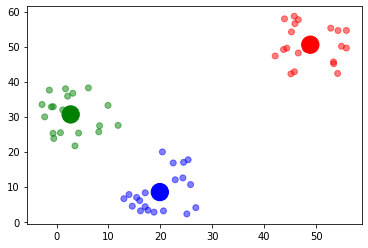

In [24]:
plt.scatter(data.iloc[:, 0], data.iloc[:, 1],
            marker='o', c= data['centroid'].apply(lambda x: colors[x]), alpha=0.5)

plt.scatter(centroids.iloc[:, 0], centroids.iloc[:, 1],
            marker='o', s=300, c= centroids.index.map(lambda x: colors[x]))


# 8. elbow

In [25]:
total_errors = []

k = 10

for i in range(k):
    _, iter_error, _ = kmeans(data.drop(['centroid', 'error'], axis=1),i+1)
    
    total_errors.append(iter_error)

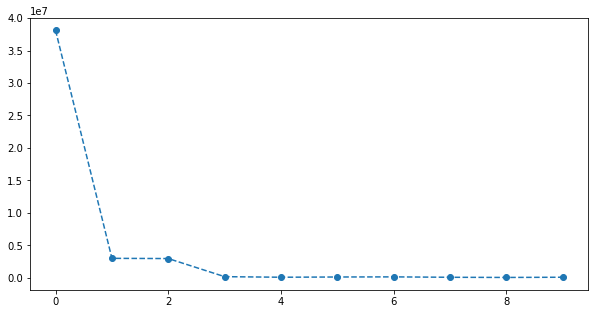

In [26]:
plt.figure(figsize = (10,5))

plt.plot(total_errors, 'o--')

plt.show()

# Part 02: K-Means ---> sklearn.cluster.KMeans

In [27]:
X = pd.read_csv('/kaggle/input/data-kmeans/Data.csv')

In [28]:
model = KMeans(n_clusters=3)

In [29]:
pred = model.fit_predict(X)

In [30]:
X['CL'] = pred

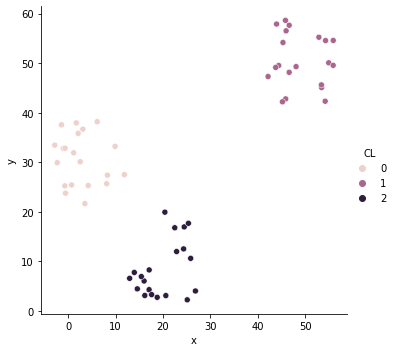

In [31]:
sns.relplot(x="x", y="y", hue='CL', data=X)

In [32]:
model.inertia_

2813.7701408000003

In [33]:
ssd = []

for k in range(2, 10):
    model=KMeans(n_clusters=k)
    
    model.fit(X.drop('CL', axis=1))
    
    ssd.append(model.inertia_)

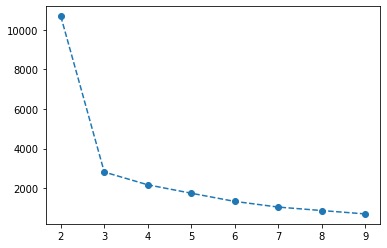

In [34]:
plt.plot(range(2,10),ssd, 'o--')

plt.show()

# Finished!